In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
from scoobpsf import scoobi

import lina
from lina.math_module import xp, _scipy

lina.math_module.update_np(np)
lina.math_module.update_scipy(scipy)

pupil_diam = 6.75*u.mm
wavelength_c = 632.8e-9*u.m

this worked
Succesfully initialized testbed interface.


# Initialize the testbed interface

this worked
Succesfully initialized testbed interface.
0.0320000015199184


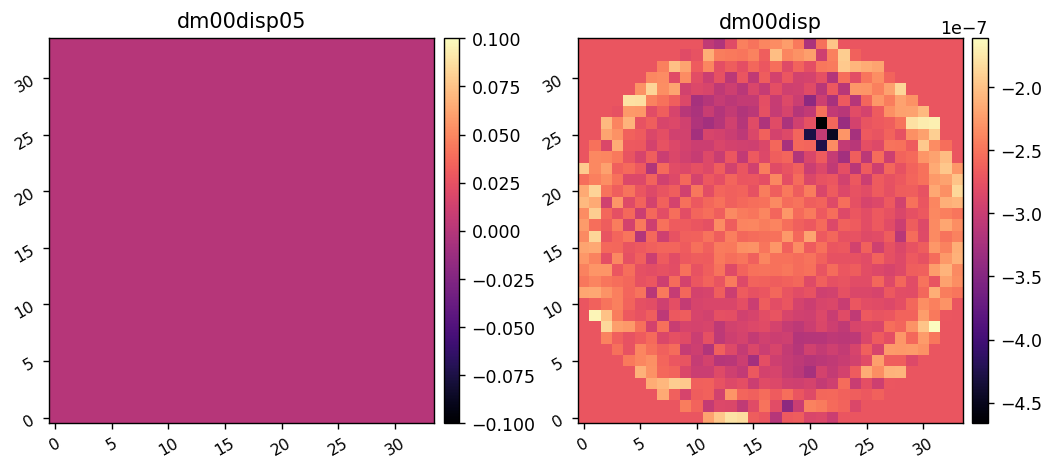

In [2]:
reload(scoobi)
tbi = scoobi.SCOOBI(dm_channel='dm00disp05', nims=5)
print(tbi.texp)

tbi.show_dm()

INFO:utils:Got semaphore index 1.


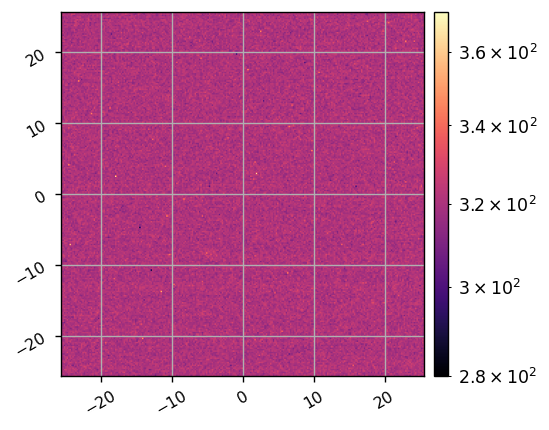

array([[321.6, 315.2, 320.8, ..., 315.2, 318.4, 322.4],
       [320.8, 324.8, 320.8, ..., 323.2, 328. , 322.4],
       [322.4, 320.8, 320.8, ..., 324.8, 315.2, 330.4],
       ...,
       [325.6, 324. , 320.8, ..., 324.8, 319.2, 324.8],
       [317.6, 322.4, 322.4, ..., 312.8, 321.6, 320.8],
       [327.2, 324. , 318.4, ..., 324. , 316.8, 318.4]])

In [3]:
tbi.snap(plot=True)

In [76]:
scoobi.move_psf(1,0)

In [14]:
scoobi.move_psf(0,-5)

In [58]:
tbi.texp= 0.005

In [19]:
scoobi.set_roi(5050,3050, 2048)
tbi.texp = 0.005

In [13]:
scoobi.set_roi(4550,3600, 512)
tbi.texp = 0.005

In [8]:
tbi.x_shift = 1
tbi.y_shift = -14

In [16]:
tbi.texp = 0.03
tbi.nims = 3

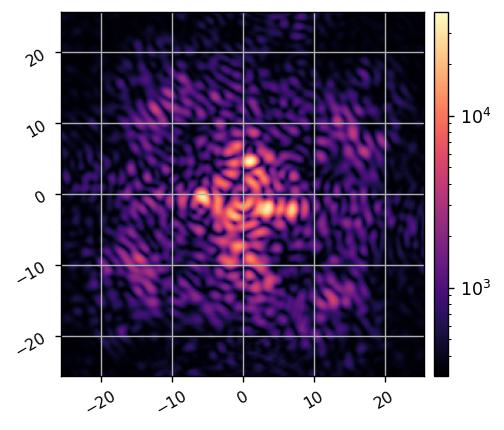

In [17]:
ref_im = tbi.snap(plot=True)

In [18]:
tbi.texp

0.0299989990890026

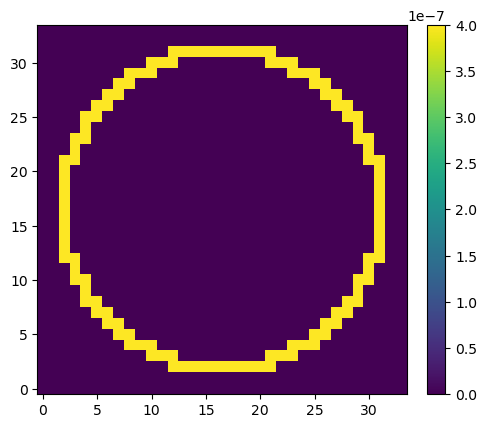

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 34)
x, y = np.meshgrid(x, x)
r = np.sqrt(x ** 2 + y ** 2)
cmd = np.ones((34, 34)) * 400e-9

cmd[r > 0.93] = 0
cmd[r < 0.85] = 0

# 1 ring in
# cmd[r > 1] = 0
# cmd[r < 0.93] = 0

# outer ring
# cmd[r > 1.06] = 0
# cmd[r < 1] = 0

plt.figure()
plt.imshow(cmd)
plt.colorbar(fraction=0.046, pad=0.04)

tbi.set_dm(cmd)

In [7]:
tbi.set_dm(cmd)